# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [1]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the *original* dataset...

In [2]:
url_train = 'https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/train.csv'
url_test = 'https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/test.csv'
#url_train = '../data/train.csv'
original_df = pd.read_csv(url_train)

In [3]:
original_df.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

**TripType** is the column that we should predict. That column is not present in the test set

In [4]:
original_df.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,453411.000000,453411.000000,4.505590e+05,453411.000000,450559.000000
mean,58.027039,95909.846115,3.075243e+10,1.108584,3727.366554
std,155.973370,55399.801147,9.163940e+10,0.707029,2779.958546
min,3.000000,5.000000,8.340000e+02,-10.000000,0.000000
25%,27.000000,49390.000000,3.400004e+09,1.000000,1404.000000
50%,39.000000,96781.000000,7.056082e+09,1.000000,3352.000000
75%,40.000000,143930.000000,3.013201e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [5]:
pd.options.display.float_format = '{:.5f}'.format
original_df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929.00000,-1,FINANCIAL SERVICES,1000.00000
1,8,9,Friday,1070080727.00000,1,IMPULSE MERCHANDISE,115.00000
2,8,9,Friday,3107.00000,1,PRODUCE,103.00000
3,8,9,Friday,4011.00000,1,PRODUCE,5501.00000
4,8,10,Friday,6414410235.00000,1,DSD GROCERY,2008.00000


Looking into the columns values...

In [6]:
set(original_df.Weekday)

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [7]:
set(original_df.DepartmentDescription)

{'1-HR PHOTO',
 'ACCESSORIES',
 'AUTOMOTIVE',
 'BAKERY',
 'BATH AND SHOWER',
 'BEAUTY',
 'BEDDING',
 'BOOKS AND MAGAZINES',
 'BOYS WEAR',
 'BRAS & SHAPEWEAR',
 'CAMERAS AND SUPPLIES',
 'CANDY, TOBACCO, COOKIES',
 'CELEBRATION',
 'COMM BREAD',
 'CONCEPT STORES',
 'COOK AND DINE',
 'DAIRY',
 'DSD GROCERY',
 'ELECTRONICS',
 'FABRICS AND CRAFTS',
 'FINANCIAL SERVICES',
 'FROZEN FOODS',
 'FURNITURE',
 'GIRLS WEAR, 4-6X  AND 7-14',
 'GROCERY DRY GOODS',
 'HARDWARE',
 'HEALTH AND BEAUTY AIDS',
 'HOME DECOR',
 'HOME MANAGEMENT',
 'HORTICULTURE AND ACCESS',
 'HOUSEHOLD CHEMICALS/SUPP',
 'HOUSEHOLD PAPER GOODS',
 'IMPULSE MERCHANDISE',
 'INFANT APPAREL',
 'INFANT CONSUMABLE HARDLINES',
 'JEWELRY AND SUNGLASSES',
 'LADIES SOCKS',
 'LADIESWEAR',
 'LARGE HOUSEHOLD GOODS',
 'LAWN AND GARDEN',
 'LIQUOR,WINE,BEER',
 'MEAT - FRESH & FROZEN',
 'MEDIA AND GAMING',
 'MENS WEAR',
 'MENSWEAR',
 'OFFICE SUPPLIES',
 'OPTICAL - FRAMES',
 'OPTICAL - LENSES',
 'OTHER DEPARTMENTS',
 'PAINT AND ACCESSORIES',
 'PER

There are `nan`s in the column, let us find them...

In [8]:
original_df[original_df.DepartmentDescription.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,nan,-2,NaN,nan
740,999,484,Friday,nan,-2,NaN,nan
1292,32,845,Friday,nan,1,NaN,nan
1293,32,845,Friday,nan,1,NaN,nan
1577,40,1004,Friday,nan,1,NaN,nan
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,nan,1,NaN,nan
450036,999,190182,Sunday,nan,-1,NaN,nan
450163,40,190230,Sunday,nan,1,NaN,nan
450361,39,190309,Sunday,nan,1,NaN,nan


When the description is NaN, then the Upc and FinelineNumber are both NaN?

In [9]:
(original_df.DepartmentDescription.isna().sum(),
 (original_df.DepartmentDescription.isna() & original_df.Upc.isna() & original_df.FinelineNumber.isna()).sum())

(972, 972)

In [10]:
original_df[original_df.Upc.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,nan,-2,NaN,nan
740,999,484,Friday,nan,-2,NaN,nan
900,5,585,Friday,nan,1,PHARMACY RX,nan
944,5,619,Friday,nan,1,PHARMACY RX,nan
945,5,619,Friday,nan,1,PHARMACY RX,nan
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,nan,1,NaN,nan
450036,999,190182,Sunday,nan,-1,NaN,nan
450163,40,190230,Sunday,nan,1,NaN,nan
450361,39,190309,Sunday,nan,1,NaN,nan


But it may be the case that Upc is NaN but not the description...

In [11]:
(original_df.Upc.isna().sum(),
 original_df.FinelineNumber.isna().sum(),
 (original_df.FinelineNumber.isna() & original_df.Upc.isna()).sum())

(2852, 2852, 2852)

Upc and FinelineNumber are both NaN at the same time

Our last step in this analysis is to see how balanced is the data...

In [12]:
bins = set(original_df.TripType)

In [13]:
original_df.groupby("VisitNumber").mean()

,TripType,Upc,ScanCount,FinelineNumber
VisitNumber,,,,
5,999.00000,68113152929.00000,-1.00000,1000.00000
9,8.00000,356695948.33333,1.00000,1906.33333
10,8.00000,5669755035.66667,1.00000,3357.66667
11,35.00000,5684737409.50000,1.00000,1874.75000
12,41.00000,26173895034.85714,1.00000,2234.14286
...,...,...,...,...
191329,24.00000,29153278779.30000,1.00000,3765.55000
191337,38.00000,9497030785.10714,0.96429,4068.14286
191343,25.00000,64517501167.14286,1.28571,4855.85714


<AxesSubplot:>

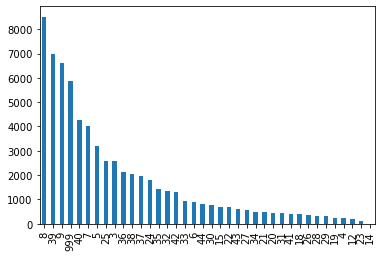

In [14]:
# to count the TripType values, we have to group the visits by VisitNumber
original_df.groupby("VisitNumber").TripType.mean().value_counts().plot(kind='bar')

**Unbalanced!!!**

Create a function to load the datasets.

**Some important decisions made here**:
1. We will use one hot encoding for Weekday and DepartmentDescription. All transformations are applied to the training and testing datasets...
1. We are handling NaN's as another category. This may not be the best approach.
1. We may have multiple records for one single visit and the goal is to classify all those records the exact same way. Therefore, we will prepare the data in a way that all the information for a visit is in the same record.
1. Based on the last bullet, we will count the DepartmentDescription for all items acquired in the same visit.
1. We drop the Upc and FinelineNumber to simplify the process. You may use it as they have a lot of information (may be using one-hot encoding for them as well)

The following operations will be performed in a function. Anyway, we present them here so that we can see them in action:

First, we drop the columns. We include TripType as we are going to treat it differently:

In [15]:
df = original_df.drop(["Upc", "FinelineNumber", "TripType"], axis=1)

In [16]:
df

,VisitNumber,Weekday,ScanCount,DepartmentDescription
0,5,Friday,-1,FINANCIAL SERVICES
1,9,Friday,1,IMPULSE MERCHANDISE
2,9,Friday,1,PRODUCE
3,9,Friday,1,PRODUCE
4,10,Friday,1,DSD GROCERY
...,...,...,...,...
453406,191344,Sunday,1,BEAUTY
453407,191344,Sunday,1,WIRELESS
453408,191344,Sunday,1,BEAUTY
453409,191347,Sunday,1,DAIRY


Now, we create the dummy columns

In [17]:
df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=True)

In [18]:
df

,VisitNumber,Weekday,ScanCount,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,DepartmentDescription_BEDDING,...,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS,DepartmentDescription_nan
0,5,Friday,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,Friday,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,Friday,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,Friday,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,Friday,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453406,191344,Sunday,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
453407,191344,Sunday,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
453408,191344,Sunday,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
453409,191347,Sunday,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we group by the VisitNumber and Weekday (they should be the same), and add all values for ScanCount, and the one-hot encoding of DepartmentDescriptioin

In [19]:
df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()

In [20]:
df

,VisitNumber,Weekday,ScanCount,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,DepartmentDescription_BEDDING,...,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS,DepartmentDescription_nan
0,5,Friday,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,Friday,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,Friday,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,Friday,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,Friday,7,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67024,191329,Sunday,20,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
67025,191337,Sunday,27,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67026,191343,Sunday,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67027,191344,Sunday,5,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
def transform_data(train_data_fname, test_data_fname):
    df_train = pd.read_csv(train_data_fname)
    df_train['is_train_set'] = 1
    df_test = pd.read_csv(test_data_fname)
    df_test['is_train_set'] = 0

    # we  get the TripType for the train set. To do that, we group by VisitNumber and
    # then we get the max (or min or avg)
    y = df_train.groupby(["VisitNumber", "Weekday"], as_index=False).max().TripType

    # we remove the TripType now, and concat training and testing data
    # the concat is done so that we have the same columns for both datasets
    # after one-hot encoding
    df_train = df_train.drop("TripType", axis=1)
    df = pd.concat([df_train, df_test])
    
    # the next three operations are the ones we have just presented in the previous lines
    
    # drop the columns we won't use (it may be good to use them somehow)
    df = df.drop(["Upc", "FinelineNumber"], axis=1)

    # one-hot encoding for the DepartmentDescription
    df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=True)

    # now we add the groupby values
    df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()
    
    # finally, we do one-hot encoding for the Weekday
    df = pd.get_dummies(df, columns=["Weekday"], dummy_na=True)

    # get train and test back
    df_train = df[df.is_train_set != 0]
    df_test = df[df.is_train_set == 0]
    
    X = df_train.drop(["is_train_set"], axis=1)
    yy = None
    XX = df_test.drop(["is_train_set"], axis=1)

    return X, y, XX, yy

Load the data...

In [22]:
# url_train definida al principio!
url_test = 'https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/test.csv'

X, y, XX, yy = transform_data(url_train, url_test)

Create the model and evaluate it

In [23]:
# split training dataset into train and "validation" 
# (we won't be using validation set in this example, because of the cross-validation;
# but it could be useful for you depending on your approach)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# results dataframe is used to store the computed results
results = pd.DataFrame(columns=('clf', 'best_acc'))

In [25]:
# we will use a DesicionTree to classify and GridSearch to determine the parameters
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 2, 5),
              'min_samples_split':(2, 3, 5, 10, 50, 100)}
tree = DT(random_state=42)
tree_clf = GridSearchCV(tree, tree_param, cv=3, scoring='accuracy') #scoring='balanced_accuracy')
tree_clf.fit(X_train, y_train)
best_tree_clf = tree_clf.best_estimator_

In [26]:
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best Decision Tree accuracy:  0.6304134697357204
DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=100,
                       random_state=42)
The best classifier so far is: 
DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=100,
                       random_state=42)


**And finally**, we predict the unknown label for the testing set

In [27]:
#X.shape, XX.shape

In [28]:
#yy = results.clf.iloc[0].predict(XX)

The last thing we do is generating a file that should be *submitted* on kaggle

In [29]:
#submission = pd.DataFrame(list(zip(XX.VisitNumber, yy)), columns=["VisitNumber", "TripType"])

In [30]:
#submission.to_csv("../data/submission.csv", header=True, index=False)

### PRACTICA ###

**Data fields**
* **TripType** - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. *TripType_999 is an "other" category.*
* **VisitNumber** - an id corresponding to a single trip by a single customer
* **Weekday** - the weekday of the trip
* **Upc** - the UPC number of the product purchased
* **ScanCount** - the number of the given item that was purchased. A negative value indicates a product return.
* **DepartmentDescription** - a high-level description of the item's department
* **FinelineNumber** - a more refined category for each of the products, created by Walmart

##### Consideraciones
* Luego de muchas pruebas con un dataset en donde dropeamos las filas con Upc=NaN observamos que los valores de accuracy eran muy bajos. Por lo tanto decidimos continuar con el *approach* original.

In [31]:
# Para comparar
models_scores = dict()

In [32]:
## Utilizamos el core del metodo original con algunas modificaciones para probar varios modelos
def transform_data(train_data_fname, test_data_fname):
    df_train = pd.read_csv(train_data_fname)
    df_train['is_train_set'] = 1
    df_test = pd.read_csv(test_data_fname)
    df_test['is_train_set'] = 0

    # we  get the TripType for the train set. To do that, we group by VisitNumber and
    # then we get the max (or min or avg)
    y = df_train.groupby(["VisitNumber", "Weekday"], as_index=False).max().TripType

    # we remove the TripType now, and concat training and testing data
    # the concat is done so that we have the same columns for both datasets
    # after one-hot encoding
    df_train = df_train.drop("TripType", axis=1)
    df = pd.concat([df_train, df_test])
    
    # the next three operations are the ones we have just presented in the previous lines
    
    # drop the columns we won't use (it may be good to use them somehow)
    df = df.drop(["Upc", "FinelineNumber"], axis=1)

    # one-hot encoding for the DepartmentDescription
    df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=True)

    # now we add the groupby values
    df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()
    
    # finally, we do one-hot encoding for the Weekday
    df = pd.get_dummies(df, columns=["Weekday"], dummy_na=True)

    ## FOR some NaiveBayes models
    # Agregamos una columna para diferenciar compras y devoluciones y pasamos a abs la variable ScanCounts
    df.loc[df['ScanCount'] >= 0, 'BuyReturn'] = 1
    df.loc[df['ScanCount'] < 0, 'BuyReturn'] = 0
    
    df['ScanCountAbs'] = abs(df['ScanCount'])

    # get train and test back
    df_train = df[df.is_train_set != 0]
    df_test = df[df.is_train_set == 0]
    
    X = df_train.drop(["is_train_set"], axis=1)
    yy = None
    XX = df_test.drop(["is_train_set"], axis=1)

    return X, y, XX, yy

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

#### Prueba con NaiveBayes

In [34]:
# Me parece que se complica utilizar NaiveBayes aca al generar las dummys. No entiendo bien si NB puede trabajar
# con dummys o no por el hecho de que se apoya en la distribucion de probabilidades

In [35]:
X, y, XX, yy = transform_data(url_train, url_test)
X = X.drop(columns=['VisitNumber','ScanCount'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [36]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB

gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()

for name, clf in zip(['GaussNB', 'MultiNB', 'CompNB'],[gnb, mnb, cnb]):
  clf.fit(X_train, y_train)
  nb_score = accuracy_score(y_test, clf.predict(X_test))
  print(name, nb_score)
  models_scores[name] = nb_score

GaussNB 0.14844099656870058
MultiNB 0.5486598040678303
CompNB 0.4137948182405888


#### Prueba con KNN

In [37]:
X, y, XX, yy = transform_data(url_train, url_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [38]:
X_train['ScaledVisitNumber'] = StandardScaler().fit_transform(X_train[['VisitNumber']])
X_train['ScaledScanCount'] = StandardScaler().fit_transform(X_train[['ScanCount']])
X_test['ScaledVisitNumber'] = StandardScaler().fit_transform(X_test[['VisitNumber']])
X_test['ScaledScanCount'] = StandardScaler().fit_transform(X_test[['ScanCount']])

X_train = X_train.drop(columns=['VisitNumber', 'ScanCount','ScanCountAbs','BuyReturn'])
X_test = X_test.drop(columns=['VisitNumber', 'ScanCount','ScanCountAbs','BuyReturn'])

<ipython-input-38-54b44992100d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ScaledVisitNumber'] = StandardScaler().fit_transform(X_train[['VisitNumber']])
<ipython-input-38-54b44992100d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ScaledScanCount'] = StandardScaler().fit_transform(X_train[['ScanCount']])
<ipython-input-38-54b44992100d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [39]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
knn_score = accuracy_score(y_test, neigh.predict(X_test))
models_scores['KNN'] = knn_score
print('KNN', knn_score)

KNN 0.5124073797801979


### Prueba con RidgeClassifier

In [40]:
X, y, XX, yy = transform_data(url_train, url_test)
X = X.drop(columns=['ScanCount'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [41]:
from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier(random_state=42)
rc.fit(X_train, y_train)
rc_score = accuracy_score(y_test, rc.predict(X_test))
models_scores['Ridge'] = rc_score
print('Ridge', rc_score)

Ridge 0.481724600924959


### Prueba con SGDClassifier

In [42]:
X, y, XX, yy = transform_data(url_train, url_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [43]:
#X_train['ScaledVisitNumber'] = MinMaxScaler().fit_transform(X_train[['VisitNumber']])
X_train['ScaledScanCount'] = MinMaxScaler().fit_transform(X_train[['ScanCountAbs']])
#X_test['ScaledVisitNumber'] = MinMaxScaler().fit_transform(X_test[['VisitNumber']])
X_test['ScaledScanCount'] = MinMaxScaler().fit_transform(X_test[['ScanCountAbs']])

X_train = X_train.drop(columns=['VisitNumber','ScanCount','ScanCountAbs'])
X_test = X_test.drop(columns=['VisitNumber','ScanCount','ScanCountAbs'])

<ipython-input-43-33414c53919f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ScaledScanCount'] = MinMaxScaler().fit_transform(X_train[['ScanCountAbs']])
<ipython-input-43-33414c53919f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ScaledScanCount'] = MinMaxScaler().fit_transform(X_test[['ScanCountAbs']])


In [44]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(n_jobs=-1, random_state=42)
sgd.fit(X_train, y_train)
sgd_score = accuracy_score(y_test, sgd.predict(X_test))
models_scores['SGD'] = sgd_score
print('SGD', sgd_score)

SGD 0.5818290317768163


### Tunning SGD

*Probamos un RandomizedGridCV de 30 iteraciones con el siguiente set de parametros:*



```
{ 'loss':('log', 'modified_huber', 'squared_hinge','hinge'), 
  'penalty':('l2', 'l1', 'elasticnet'),
  'learning_rate': ('invscaling', 'adaptive', 'constant'),
  'eta0': (0.001, 0.01, 0.1)
}
```

*Luego de descartar aquellos parametros que no 'rankeaban' en el score decidimos hacer un GridSearchCV acotado a aquellos parametros considerados optimos:*

```
{ 'loss':('log', 'modified_huber', 'squared_hinge'), 
  'penalty':('l2', 'l1'),
  'learning_rate': ('invscaling','adaptive')
}
```

In [47]:
## Busqueda del mejor SGD
X, y, XX, yy = transform_data(url_train, url_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

X_train['ScaledScanCount'] = MinMaxScaler().fit_transform(X_train[['ScanCountAbs']])
X_test['ScaledScanCount'] = MinMaxScaler().fit_transform(X_test[['ScanCountAbs']])

X_train = X_train.drop(columns=['VisitNumber','ScanCount','ScanCountAbs'])
X_test = X_test.drop(columns=['VisitNumber','ScanCount','ScanCountAbs'])

<ipython-input-47-02099e57ecd8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ScaledScanCount'] = MinMaxScaler().fit_transform(X_train[['ScanCountAbs']])
<ipython-input-47-02099e57ecd8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ScaledScanCount'] = MinMaxScaler().fit_transform(X_test[['ScanCountAbs']])


In [48]:
sgd_param = {'loss':('log', 'modified_huber'), 
             'penalty':('l2', 'l1')
             }

tunn_sgd = SGDClassifier(n_jobs=-1, random_state=42, eta0=0.1, learning_rate='adaptive')
sgd_clf = GridSearchCV(tunn_sgd, sgd_param, cv=3, scoring='accuracy')
sgd_clf.fit(X_train, y_train)
best_sgd_clf = sgd_clf.best_estimator_

In [49]:
sgd_clf.best_score_

0.6184569479965899

In [50]:
accuracy_score(y_test, best_sgd_clf.predict(X_test))

0.543040429658362

In [51]:
pd.DataFrame(sgd_clf.cv_results_).sort_values(by='rank_test_score')[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,9.91092,0.20353,0.01731,0.00043,modified_huber,l1,"{'loss': 'modified_huber', 'penalty': 'l1'}",0.62359,0.61905,0.61272,0.61846,0.00446,1
0,4.82264,0.02748,0.01629,0.00047,log,l2,"{'loss': 'log', 'penalty': 'l2'}",0.62244,0.61957,0.60882,0.61694,0.00586,2
1,10.27524,0.43108,0.01697,0.00004,log,l1,"{'loss': 'log', 'penalty': 'l1'}",0.62340,0.61637,0.60921,0.61633,0.00579,3


*Del top 3 de configuraciones elegimos la 2da ya que arrojaba mejor valor en el test score*

In [52]:
best_sgd = SGDClassifier(n_jobs=-1, random_state=42, eta0=0.1, learning_rate='adaptive',loss='log', penalty='l2')
best_sgd.fit(X_train, y_train)
best_sgd_score = accuracy_score(y_test, best_sgd.predict(X_test))
models_scores['Best SGD'] = best_sgd_score
print(best_sgd_score)

### Prueba con RandomForest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
X, y, XX, yy = transform_data(url_train, url_test)
X = X.drop(columns=['VisitNumber','ScanCount'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [143]:
rf_param = {'max_features': ('sqrt', 'log2'),
            'criterion': ('gini','entropy'),
            'max_depth':(50, 75),
            'n_estimators': (250, 500)            
           }

tunn_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_clf = GridSearchCV(tunn_rf, rf_param, cv=3, scoring='accuracy', verbose=1)
rf_clf.fit(X_train, y_train)
best_rf_clf = rf_clf.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 18.1min finished


In [145]:
pd.set_option('display.max_colwidth', 150)
pd.DataFrame(rf_clf.cv_results_)[['rank_test_score','params','mean_test_score']].sort_values(by='rank_test_score')[:5]

,rank_test_score,params,mean_test_score
11,1,"{'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'n_estimators': 500}",0.66385
8,2,"{'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 500}",0.66373
7,3,"{'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 250}",0.66279
10,4,"{'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'n_estimators': 250}",0.66275
17,5,"{'criterion': 'gini', 'max_depth': 75, 'max_features': 'log2', 'n_estimators': 500}",0.66266


In [148]:
rf_score = accuracy_score(y_test, best_rf_clf.predict(X_test))
models_scores['RF'] = rf_score
print('RF', rf_score)

RF 0.6717390223283107


In [152]:
print('Tabla de Scores:')
pd.DataFrame.from_dict(models_scores, orient='index', columns=['Accuracy']).sort_values(by='Accuracy',ascending=False)

Tabla de Scores:


,Accuracy
XGB,0.67368
RF,0.67174
Best SGD,0.61962
SGD,0.58183
MultiNB,0.54866
KNN,0.51241
Ridge,0.48172
CompNB,0.41379
GaussNB,0.14844


In [151]:
XX_vn = XX['VisitNumber'] # Como no utilizamos VisitNumber para el train, lo guardamos en otra variable para luego
# insertarlo en el submission.csv

XX = XX.drop(columns=['VisitNumber','ScanCount'])
yy = best_rf_clf.predict(XX)
submission = pd.DataFrame(list(zip(XX_vn, yy)), columns=["VisitNumber", "TripType"])
submission.to_csv("submission.csv", header=True, index=False)

### YAPA !! Prueba con XGBoost

*Las pruebas con XGBoost dieron mejores resultados pero el algoritmo tardaba mucho tiempo en terminar.*

*De todas maneras dejamos una pequeña muestra de la implementacion a continuación:*

In [58]:
from xgboost import XGBClassifier

X, y, XX, yy = transform_data(url_train, url_test)
X = X.drop(columns=['ScanCountAbs','BuyReturn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [59]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_score = accuracy_score(y_test, xgb.predict(X_test))
models_scores['XGB'] = xgb_score
print('XGB', xgb_score)

XGB 0.6736784524342334


In [153]:
print('Tabla Final de Scores:')
pd.DataFrame.from_dict(models_scores, orient='index', columns=['Accuracy']).sort_values(by='Accuracy',ascending=False)

Tabla Final de Scores:


,Accuracy
XGB,0.67368
RF,0.67174
Best SGD,0.61962
SGD,0.58183
MultiNB,0.54866
KNN,0.51241
Ridge,0.48172
CompNB,0.41379
GaussNB,0.14844
